# Read data from an existing file

1. Read in csv file from url

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
c=pd.read_csv(url)
c.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Alternatively, one may type the data and create a pandas dataframe

In [49]:

# Create a DataFrame from dict narray / lists
  
# initialize data of lists.
data = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18]}
  
# Create DataFrame
df = pd.DataFrame(data)
  
# Print the output.
df

,Name,Age
0,Tom,20
1,nick,21
2,krish,19
3,jack,18


2. Subset a dataset

In [ ]:
print(c.iloc[range(7)]) # display the first 7 rows
c[c["Region"] == "AFRICA"] # find all African countries

3. Conversion for datasets containing repeated measurement

In [4]:
namelst = ["y" + str(i) for i in range(1, 5)]
namelst[0:0] = ["condition","id"]
dog=pd.read_csv("https://online.stat.psu.edu/onlinecourses/sites/stat505/files/data/dog1.txt", delimiter="\s+", header=None)
dog.columns = namelst
dog.head()

# the following sep=" " is unsafe because it thinks the delimiter is a single space
# dog1=pd.read_csv("https://online.stat.psu.edu/onlinecourses/sites/stat505/files/data/dog1.txt", sep=" ", header=None)
# dog1.head()

,condition,id,y1,y2,y3,y4
0,1,1,4.0,4.1,3.6,3.1
1,1,2,4.2,3.7,4.8,5.2
2,1,3,4.3,4.3,4.5,5.4
3,1,4,4.2,4.6,5.3,4.9
4,1,5,4.6,5.3,5.9,5.3


- Wide to long

In [5]:
dog_long = pd.melt(dog, id_vars=["condition", "id"], var_name="measurement", value_name="value")

dog_long.head()

,condition,id,measurement,value
0,1,1,y1,4.0
1,1,2,y1,4.2
2,1,3,y1,4.3
3,1,4,y1,4.2
4,1,5,y1,4.6


- Long to wide

In [6]:
dog_wide = dog_long.pivot(index=["id", "condition"], columns="measurement", values="value").reset_index()
dog_wide.head()

measurement,id,condition,y1,y2,y3,y4
0,1,1,4.0,4.1,3.6,3.1
1,2,1,4.2,3.7,4.8,5.2
2,3,1,4.3,4.3,4.5,5.4
3,4,1,4.2,4.6,5.3,4.9
4,5,1,4.6,5.3,5.9,5.3


# Descriptive Statistics

count    144.000000
mean       4.033333
std        0.758725
min        3.000000
25%        3.400000
50%        3.950000
75%        4.500000
max        5.900000
Name: value, dtype: float64


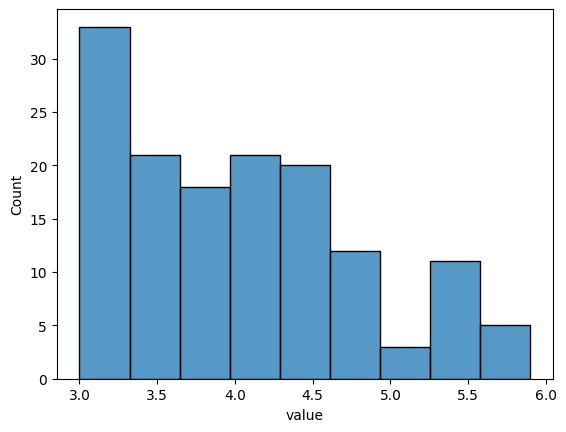

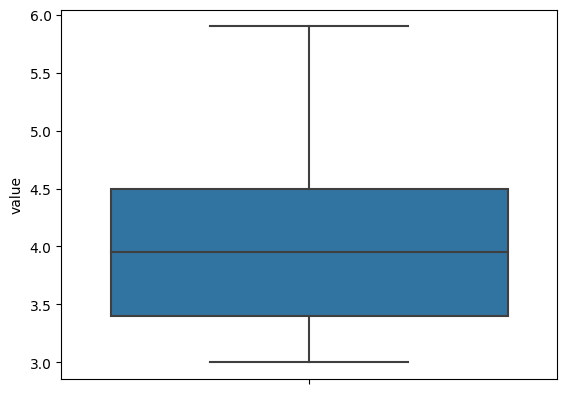

In [7]:
# continuous variable
print(dog_long["value"].describe())

# histogram
sns.histplot(data=dog_long, x="value")
plt.show()

# boxplot
sns.boxplot(y=dog_long["value"] )
plt.show()



In [8]:

# one-way table for categorical variable
print(dog_long["condition"].value_counts())
print(dog_long["condition"].value_counts(normalize=True)) # relative frequency

condition
4    40
1    36
3    36
2    32
Name: count, dtype: int64
condition
4    0.277778
1    0.250000
3    0.250000
2    0.222222
Name: proportion, dtype: float64


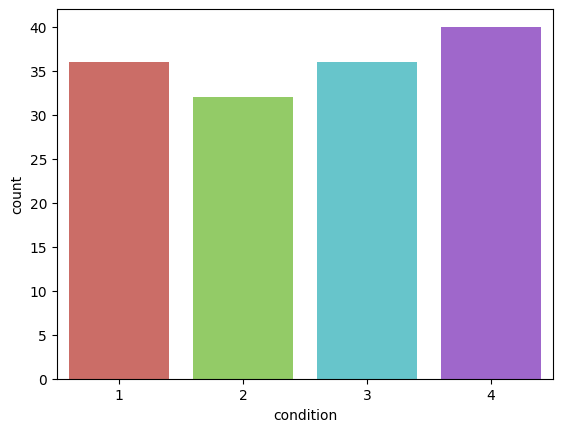

In [9]:
sns.countplot(x = 'condition', data = dog_long, palette = 'hls')
plt.show()

In [19]:
# 2-way contingency table
ct = pd.crosstab(dog_long['condition'], dog_long['measurement'], normalize=False, margins=False)
ct

measurement,y1,y2,y3,y4
condition,,,,
1,9,9,9,9
2,8,8,8,8
3,9,9,9,9
4,10,10,10,10


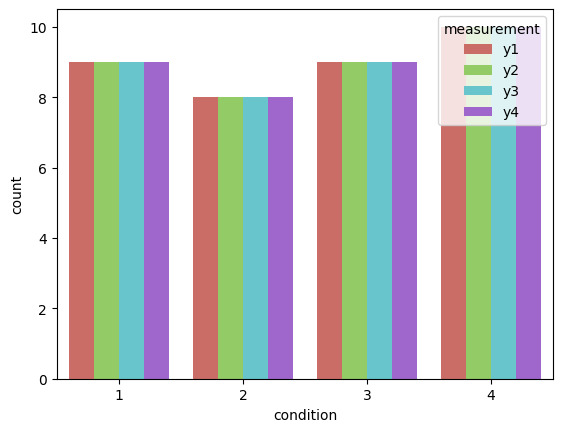

In [15]:

sns.countplot(x = 'condition', hue="measurement", data = dog_long, palette = 'hls')
plt.show()

Side-by-side boxplot

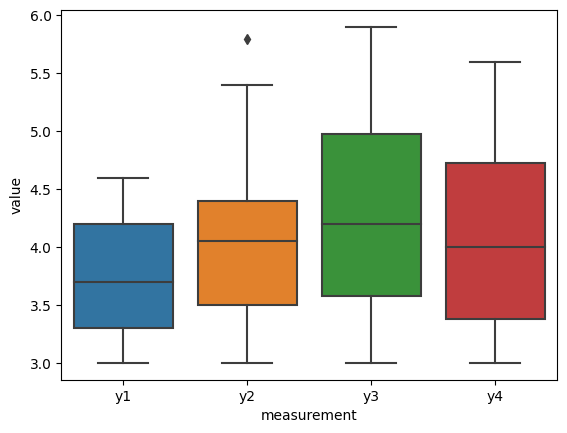

In [11]:
sns.boxplot( x=dog_long["measurement"], y=dog_long["value"] )
plt.show()

Scatterplot

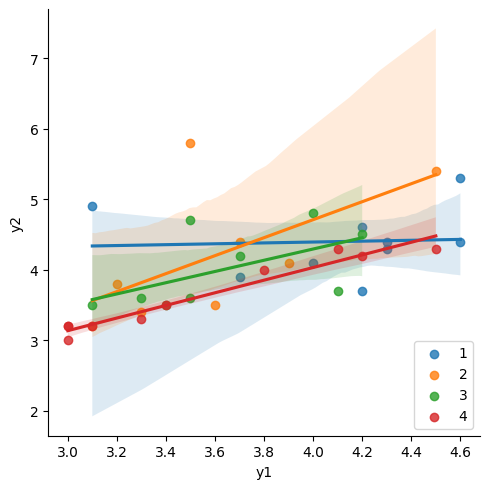

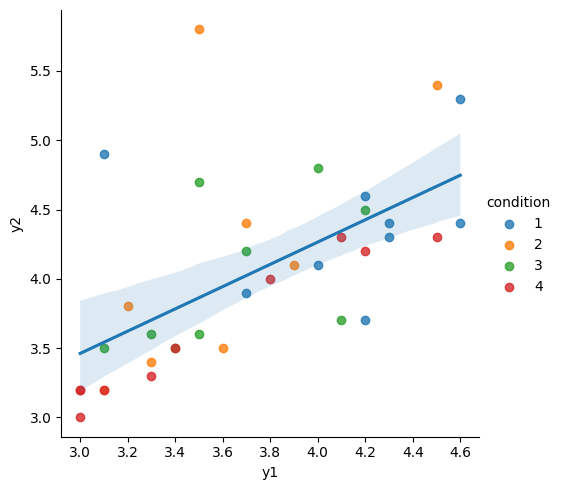

In [12]:
sns.lmplot( x="y1", y="y2", data=dog_wide, fit_reg=True, hue='condition', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

g = sns.lmplot(x="y1", y="y2", hue="condition", data=dog_wide, fit_reg=False)
sns.regplot(x="y1", y="y2", data=dog_wide, scatter=False, ax=g.axes[0, 0])

plt.show()

## Contingency table analysis

In [30]:
# one may also use statsmodels.stats.contingency_tables 
df = pd.DataFrame({'Order': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'Product': ['TV', 'TV', 'Comp', 'TV', 'TV', 'Comp',
                               'Comp', 'Comp', 'TV', 'Radio', 'TV', 'Radio', 'Radio',
                               'Radio', 'Comp', 'Comp', 'TV', 'TV', 'Radio', 'TV'],
                   'Country': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                               'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']})

# 1. Goodness-of-fit test for one-way table
from scipy.stats import chisquare

observed = ct['Product'].values # observed frequencies

#  null hypothesis: a uniform distribution
n = observed.sum()
expected = np.array([n/3]*3) # expected frequencies

# perform the goodness-of-fit test
stat, p = chisquare(observed, expected)

print("Chi-squared statistic:", stat)
print("p-value:", p)

# 2. two-way contingency table
ct = pd.crosstab(index=df['Country'], columns=df['Product'])

# Pearson's chisquare test
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(ct)

print("Chi-squared statistic:", stat)
print("Degrees of freedom:", dof)
print("p-value:", p)
print("Expected frequencies:\n", expected)

Chi-squared statistic: 2.75
Degrees of freedom: 4
p-value: 0.6004940400362729
Expected frequencies:
 [[1.2 1.  1.8]
 [2.4 2.  3.6]
 [2.4 2.  3.6]]


## t-test

In [31]:
# 1. one-sample t-test
from scipy.stats import ttest_1samp

# create a random sample
sample = np.random.normal(10, 2, size=20)

# set the null hypothesis mean
null_mean = 9

# perform the one-sample t-test
t_stat, p_value = ttest_1samp(sample, null_mean)

# print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 2.0627806348813893
p-value: 0.05307316437726764


In [33]:
# 2. two-sample t-test (independent samples)
from scipy.stats import ttest_ind

# create two random samples with different means
sample1 = np.random.normal(10, 2, size=20)
sample2 = np.random.normal(12, 3, size=20)

# perform the two-sample t-test
t_stat, p_value = ttest_ind(sample1, sample2) # default uses equal variance assumption

# print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# perform the two-sample t-test assuming unequal variances
t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False)

# print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -2.637855187926157
p-value: 0.012024066599466254
t-statistic: -2.6378551879261574
p-value: 0.012891060401088445


It should be noted that the ttest_ind() function in scipy does not calculate the Welch's t-statistic properly when assming unequal variance. Next, it shows how to do the test using the pingouin package.

In [36]:
import pingouin as pg

result0 = pg.ttest(sample1,
                  sample2)
 
# Print the result
print(result0)

result = pg.ttest(sample1,
                  sample2,
                  correction=True)
 
# Print the result
print(result)

               T  dof alternative     p-val           CI95%   cohen-d   BF10   
T-test -2.637855   38   two-sided  0.012024  [-3.96, -0.52]  0.834163  4.311  \

           power  
T-test  0.729315  
               T        dof alternative     p-val           CI95%   cohen-d   
T-test -2.637855  31.237996   two-sided  0.012891  [-3.97, -0.51]  0.834163  \

         BF10     power  
T-test  4.311  0.729315  


In [42]:
# 3. paired t-test

import scipy.stats as stats
  
# pre holds the mileage before 
# applying the different engine oil
pre = [30, 31, 34, 40, 36, 35,
       34, 30, 28, 29]
  
# post holds the mileage after 
# applying the different engine oil
post = [30, 31, 32, 38, 32, 31,
        32, 29, 28, 30]
  
# Performing the paired sample t-test
stats.ttest_rel(pre, post)

TtestResult(statistic=2.584921310565987, pvalue=0.029457853822895275, df=9)

## Inference on proportion parameters

In [41]:
from statsmodels.stats.proportion import proportions_ztest

# 1. perform one proportion z-test

# H_A: p>p0
# result = proportions_ztest(count=60, nobs=100, value=0.64,  alternative='larger')
# H_A: p<p0
# result = proportions_ztest(count=60, nobs=100, value=0.64,  alternative='smaller')

# two-sided alternative
result = proportions_ztest(count=60, nobs=100, value=0.64,  alternative='two-sided')

print("z-test statistic:", result[0])
print("pvalue:", result[1])

z-test statistic: -0.8164965809277268
pvalue: 0.41421617824252466


In [44]:
# 2. compare two proportions
result = proportions_ztest(count=np.array([60,70]), nobs=np.array([100,100]), alternative='two-sided')
print("z-test statistic:", result[0])
print("pvalue:", result[1])


z-test statistic: -1.482498633322202
pvalue: 0.13820766697402584


In [45]:
# 3. Fisher's exact test
# creating data
data = [[2, 8], [7, 3]]
  
# performing fishers exact test on the data
odd_ratio, p_value = stats.fisher_exact(data)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

odd ratio is : 0.10714285714285714
p_value is : 0.06977851869492736


In [47]:
# 4. McNemar test for paired binary data
from statsmodels.stats.contingency_tables import mcnemar
# define contingency table
table = [[40, 20],
		 [10, 30]]
# calculate mcnemar test
result = mcnemar(table, exact=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')

statistic=10.000, p-value=0.099
Same proportions of errors (fail to reject H0)


# Simple Linear Regression

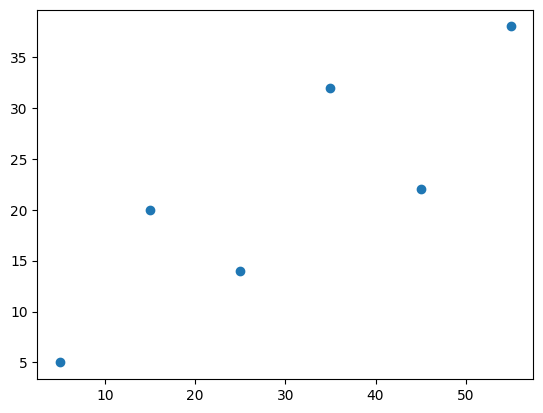

In [51]:
from sklearn.linear_model import LinearRegression
  
# initialize data of lists.
data = {'x': [5, 15, 25, 35, 45, 55],
        'y': [5, 20, 14, 32, 22, 38]}
  
# Create DataFrame
df = pd.DataFrame(data)
  
plt.scatter(df['x'], df['y'])

In [53]:
import statsmodels.formula.api as smf
model = smf.ols("y ~ x", df).fit()
model.summary()

C:\Users\Nan\AppData\Roaming\Python\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     10.08
Date:                Tue, 25 Apr 2023   Prob (F-statistic):             0.0337
Time:                        23:18:07   Log-Likelihood:                -19.071
No. Observations:                   6   AIC:                             42.14
Df Residuals:                       4   BIC:                             41.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6333      5.872      0.959      0.392     -10.670      21.936
x              0.5400      0.170      3.175      0.034       0.068       1.012
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.606
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.651
Skew:                           0.008   Prob(JB):                        0.722
Kurtosis:                       1.387   Cond. No.                         69.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Peform analysis of variance on fitted linear model
from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)


ANOVA results
           df      sum_sq     mean_sq          F    PR(>F)
x         1.0  510.300000  510.300000  10.078341  0.033708
Residual  4.0  202.533333   50.633333        NaN       NaN


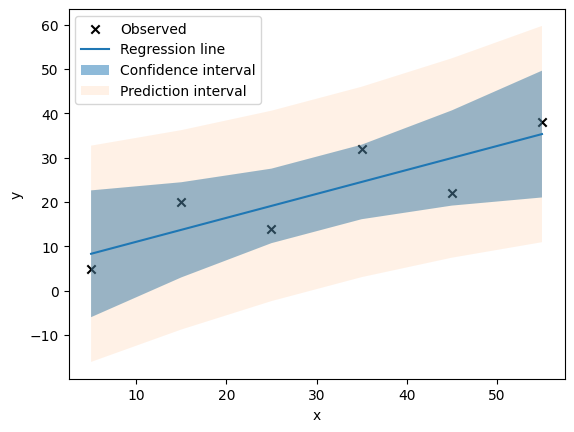

In [60]:
# Prediction interval
alpha = .05
predictions = model.get_prediction(df).summary_frame(alpha)

plt.scatter(df['x'], df['y'], label='Observed', marker='x', color='black')
plt.plot(df['x'], predictions['mean'], label='Regression line')
# confidence interval for the mean
plt.fill_between(df['x'], predictions['mean_ci_lower'], predictions['mean_ci_upper'], alpha=.5, label='Confidence interval')
# prediction interval for the response
plt.fill_between(df['x'], predictions['obs_ci_lower'], predictions['obs_ci_upper'], alpha=.1, label='Prediction interval')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

# Resources:

- take a specific subset https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
- add new column https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
- add new row https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/